In [1]:
import neuralnet as nn
import numpy as np
import matplotlib.pyplot as plt

In [115]:
border = 0.5
x = np.linspace(-np.e * border, np.e * border, 50)

fs = {
    'linear' : lambda x : x,
    'square' : lambda x : x ** 2,
    'cubiq' : lambda x : x ** 3,
    'task' : lambda x : np.cos(x) * x ** 3
}

key = 'task'

y = [[v] for v in fs[key](x)]


In [116]:
percep1 = nn.Net(1, [7, 1], [lambda x: nn.functions.sigm(x), lambda x : x], [lambda x : nn.functions.der_sigm(x), lambda x : 1])

In [117]:
percep1.fit(x, y, 0.1, 3000, min_hitrate=None, max_error=0.002)

epoch 1 has started, error = 0.08323836119263978, hitrate = 0.0
epoch 2 has started, error = 0.021828795544563774, hitrate = 0.0
epoch 3 has started, error = 0.017254281782469263, hitrate = 0.0
epoch 4 has started, error = 0.014474110112514831, hitrate = 0.0
epoch 5 has started, error = 0.016100684333715247, hitrate = 0.0
epoch 6 has started, error = 0.013505659106012684, hitrate = 0.0
epoch 7 has started, error = 0.010913972125752458, hitrate = 0.0
epoch 8 has started, error = 0.012252309010555008, hitrate = 0.0
epoch 9 has started, error = 0.0119542882654396, hitrate = 0.0
epoch 10 has started, error = 0.010270401675985414, hitrate = 0.0
epoch 11 has started, error = 0.01176050477579953, hitrate = 0.0
epoch 12 has started, error = 0.011974457100814774, hitrate = 0.0
epoch 13 has started, error = 0.00953821972560285, hitrate = 0.0
epoch 14 has started, error = 0.01004560178043849, hitrate = 0.0
epoch 15 has started, error = 0.009348692743801939, hitrate = 0.0
epoch 16 has started, err

In [118]:
def predict(model, x):
    y_pr = []
    for i in range(len(x)):
        y_pr.append(model.predict(x[i]))
    return y_pr

In [119]:
percep2 = nn.Net(1, [32, 7, 1], [nn.functions.sigm, nn.functions.sigm, lambda x : x], [nn.functions.der_sigm, nn.functions.der_sigm, lambda x : 1])

In [120]:
def decrease(now, count, speed):
    if now % (100 * (count + 1)) == 0:
        speed *= 0.87
        count + 1
    return count, speed

In [121]:
percep2.train_speed_decrease_func = decrease

In [122]:
percep2.fit(x, y, 0.1, 3000, min_hitrate=None, max_error=0.002)

epoch 1 has started, error = 0.1205295768721437, hitrate = 0.0
epoch 2 has started, error = 0.05543670515548059, hitrate = 0.0
epoch 3 has started, error = 0.036717578641162804, hitrate = 0.0
epoch 4 has started, error = 0.03156675077755727, hitrate = 0.0
epoch 5 has started, error = 0.02603110875862684, hitrate = 0.0
epoch 6 has started, error = 0.023566357693534518, hitrate = 0.0
epoch 7 has started, error = 0.01873829976330549, hitrate = 0.0
epoch 8 has started, error = 0.018798936535987673, hitrate = 0.0
epoch 9 has started, error = 0.015076538584216816, hitrate = 0.0
epoch 10 has started, error = 0.014877771972933803, hitrate = 0.0
epoch 11 has started, error = 0.013680685672801191, hitrate = 0.0
epoch 12 has started, error = 0.011273504868604557, hitrate = 0.0
epoch 13 has started, error = 0.013635957913857227, hitrate = 0.0
epoch 14 has started, error = 0.011699251059725359, hitrate = 0.0
epoch 15 has started, error = 0.01074456449053739, hitrate = 0.0
epoch 16 has started, erro

In [154]:
def fun_h(x, a, c):
  return np.exp(-a * abs(x - c))

In [155]:
def fun_H(t_x, t_c, a):
  H = np.zeros((len(t_x), len(t_c)))
  for i in range(len(t_x)):
    for j in range(len(t_c)):
      H[i][j] = fun_h(t_x[i], a, t_c[j])
  return H

In [156]:
def fun_RBN(x, t_c, a, w):
  h = np.zeros((len(t_c)))
  for i in range(len(t_c)):
    h[i] = fun_h(x, a, t_c[i])
  return np.dot(h, w)

In [157]:
c = np.linspace(-np.e * border, np.e * border, )

In [158]:
r = 1.5
a = 1 / (2  * r ** 2)

H = fun_H(x, c, a)

In [159]:
H_ = np.dot(np.linalg.inv(np.dot(H.transpose(), H)), H.transpose())
W = np.dot(H_, y)
pred_y = np.zeros((len(x)))
for i in range(len(x)):
  pred_y[i] = fun_RBN(x[i], c, a, W)

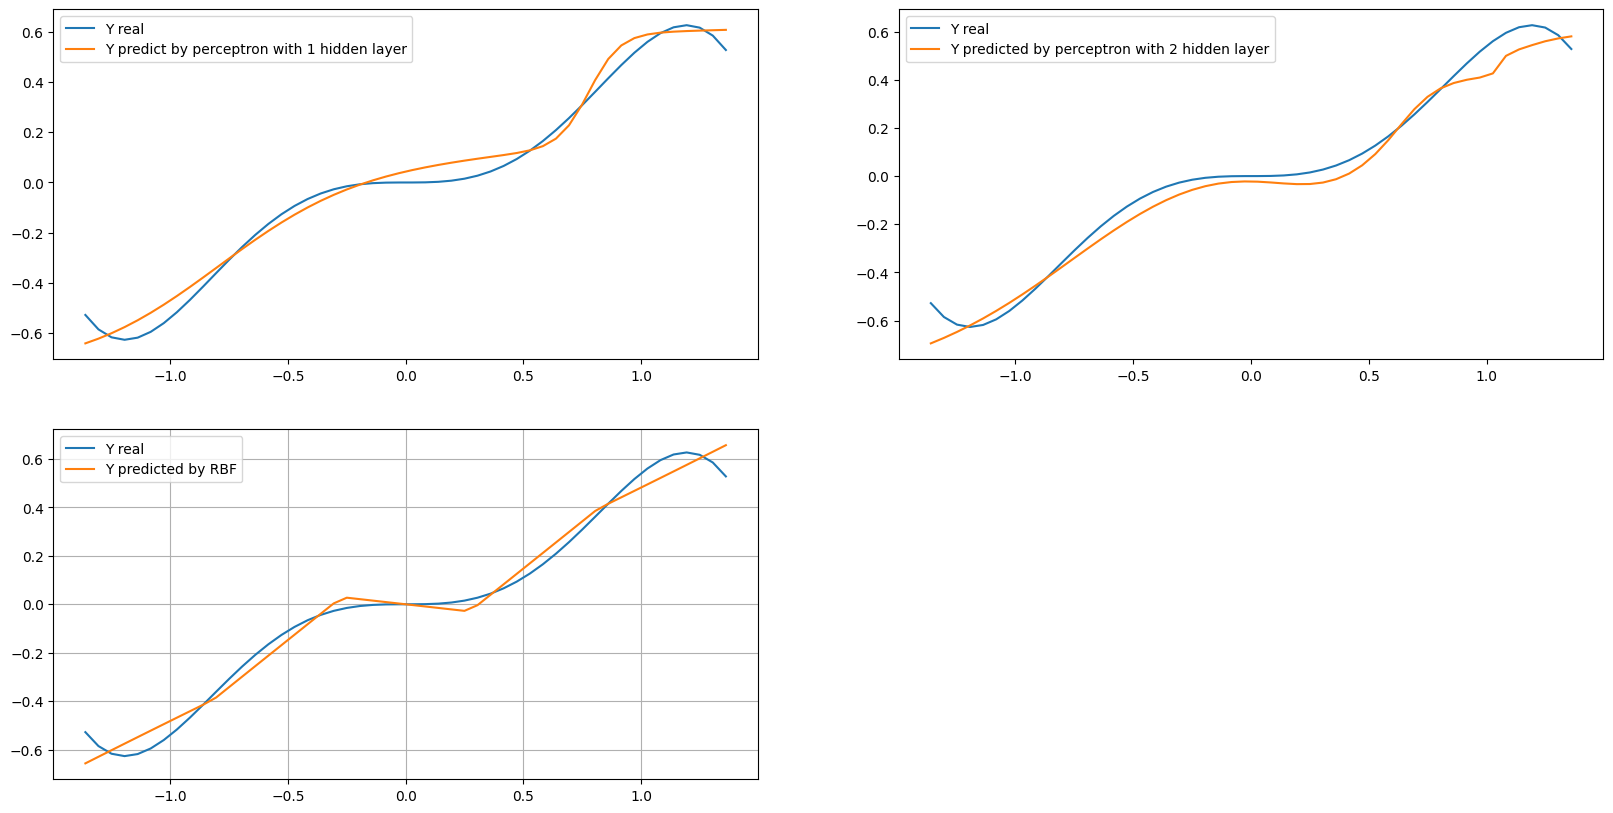

In [160]:
fig1 = plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.plot(x, y, label='Y real')
plt.plot(x, predict(percep1, x,), label='Y predict by perceptron with 1 hidden layer')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x, y, label='Y real')
plt.plot(x, predict(percep2, x), label='Y predicted by perceptron with 2 hidden layer')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x, y, label='Y real')
plt.plot(x, pred_y, label='Y predicted by RBF')
plt.legend()

plt.grid()
plt.show()

In [130]:
t = [-1.2, 0.2, -2.1, -4.4, -5.3, -7.8, -12.1, -10, -14.4, -11.3, -14.8, -8.5, -2.5, -2.5, -5.2, -4.1, -0.5, -0.1, -5.5, -7.5, -9.8, -5.7, -10.3, -11.2, -10.3, -10.9, -12.0, -11.2, -0.1, 1.0, 0.5]

days = [i + 1 for i in range(31)]

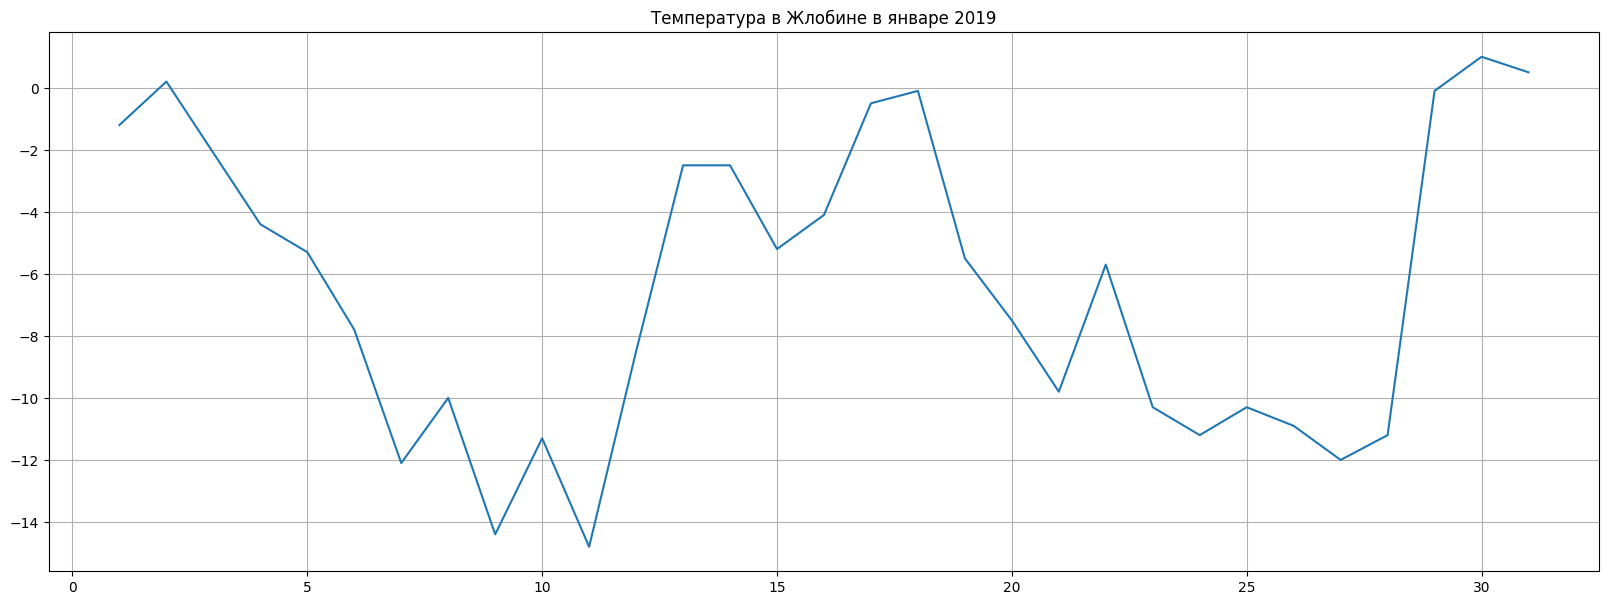

In [3]:
plt.figure(figsize=(20, 7))
plt.plot(days, t)
plt.grid()
plt.title('Температура в Жлобине в январе 2019')
plt.show()

In [4]:
def make_time_range(x, block_size):
    res = []
    y = []
    for i in range(len(x) - block_size):
        arr = []
        for j in range(block_size):
            arr.append(x[i + j])
        res.append(arr)
        y.append([x[i + block_size]])
    return res, y

In [5]:
row_size = 7

In [22]:
x, y = make_time_range(t, row_size)

In [7]:
def decrease(now, count, speed):
    if now > 130 and count == 0:
        speed *= 0.80
        count += 1
    elif count == 1 and now > 280:
        speed *= 0.70
        count += 1
    elif count == 2 and now > 390:
        speed *= 0.80
        count += 1
    elif count == 3 and now > 510:
        speed *= 0.15
        count += 1
    return count, speed

In [104]:
funcs = [nn.functions.sigm, nn.functions.sigm, lambda x : x]
ders = [nn.functions.der_sigm, nn.functions.der_sigm, lambda x : 1]

elman = nn.ElmanNet(row_size, [128, 16, 1], funcs, ders, normalize_weights=True)

In [105]:
elman.train_speed_decrease_func = decrease

In [106]:
elman.fit(x, y, train_speed=0.001, max_epochs=1000, min_hitrate=None, max_error=0.8)

epoch 1 has started, error = 52.16718488190134, hitrate = 0.0
epoch 2 has started, error = 28.006695938830614, hitrate = 0.0
epoch 3 has started, error = 23.306791902349442, hitrate = 0.0
epoch 4 has started, error = 25.634443861982746, hitrate = 0.0
epoch 5 has started, error = 21.80502004992069, hitrate = 0.0
epoch 6 has started, error = 19.17593278194818, hitrate = 0.0
epoch 7 has started, error = 22.952129701695114, hitrate = 0.0
epoch 8 has started, error = 19.748461970156576, hitrate = 0.0
epoch 9 has started, error = 18.94887658068506, hitrate = 0.0
epoch 10 has started, error = 18.72832163770302, hitrate = 0.0
epoch 11 has started, error = 18.214781538238068, hitrate = 0.0
epoch 12 has started, error = 17.718404510992574, hitrate = 0.0
epoch 13 has started, error = 17.879622167406634, hitrate = 0.0
epoch 14 has started, error = 22.773999071510385, hitrate = 0.0
epoch 15 has started, error = 18.71756885982215, hitrate = 0.0
epoch 16 has started, error = 18.57506236861487, hitrat

In [107]:
t_2022 = [3.4, -7.4, 3.4, 2.9, 1.9, -0.2, -6.4, -7.0, -4.4, -7.6, -13.1, -16.0, -4.3, 2.9, -3.3, -5.7, -0.3, -9.3, -4.1, -3.9, -3.6, -6.8, -7.5, -9.7, -8.7, -7.1, -3.2, 0.5, -5.2, 0.2, -1.7]

In [108]:
def pred_time_row(model, x):
    row = x[:row_size]
    pred = row.copy()

    if isinstance(model, nn.ElmanNet):
        model.clear_recurrent_signals()
    for i in range(len(t) - len(row)):
        pr = model.predict(row)
        pred = np.append(pred, pr)

        row = np.append(row[1:], pr)
    return pred

In [109]:
percep3 = nn.Net(row_size, [128, 16, 1], funcs, ders)

In [110]:
percep3.fit(x, y, train_speed=0.01, max_epochs=1000, max_error=0.7, min_hitrate=None)

epoch 1 has started, error = 40.68423227959546, hitrate = 0.0
epoch 2 has started, error = 18.76058151741619, hitrate = 0.0
epoch 3 has started, error = 13.89705307015799, hitrate = 0.0
epoch 4 has started, error = 11.62304459141793, hitrate = 0.041666666666666664
epoch 5 has started, error = 9.942144085258375, hitrate = 0.0
epoch 6 has started, error = 8.408409670732874, hitrate = 0.0
epoch 7 has started, error = 7.2053930091043314, hitrate = 0.0
epoch 8 has started, error = 6.992534661973643, hitrate = 0.0
epoch 9 has started, error = 7.5761396100186955, hitrate = 0.0
epoch 10 has started, error = 7.0458511585902235, hitrate = 0.0
epoch 11 has started, error = 5.871199037557442, hitrate = 0.0
epoch 12 has started, error = 5.569862781240758, hitrate = 0.0
epoch 13 has started, error = 5.80710694555903, hitrate = 0.0
epoch 14 has started, error = 4.963775399869761, hitrate = 0.0
epoch 15 has started, error = 4.306556102283294, hitrate = 0.0
epoch 16 has started, error = 3.2079678167514

In [113]:
data = t_2022
pred_e = pred_time_row(elman, data)
pred_pr = pred_time_row(percep3, data)

f:\лабы\сем 5\нейронки\лаба 5\neuralnet.py:50: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(functions.sigm_coeff * -x))


mse percep = (21.77112322857504, 0.0)
mse elman = (21.59611629532823, 0.0)


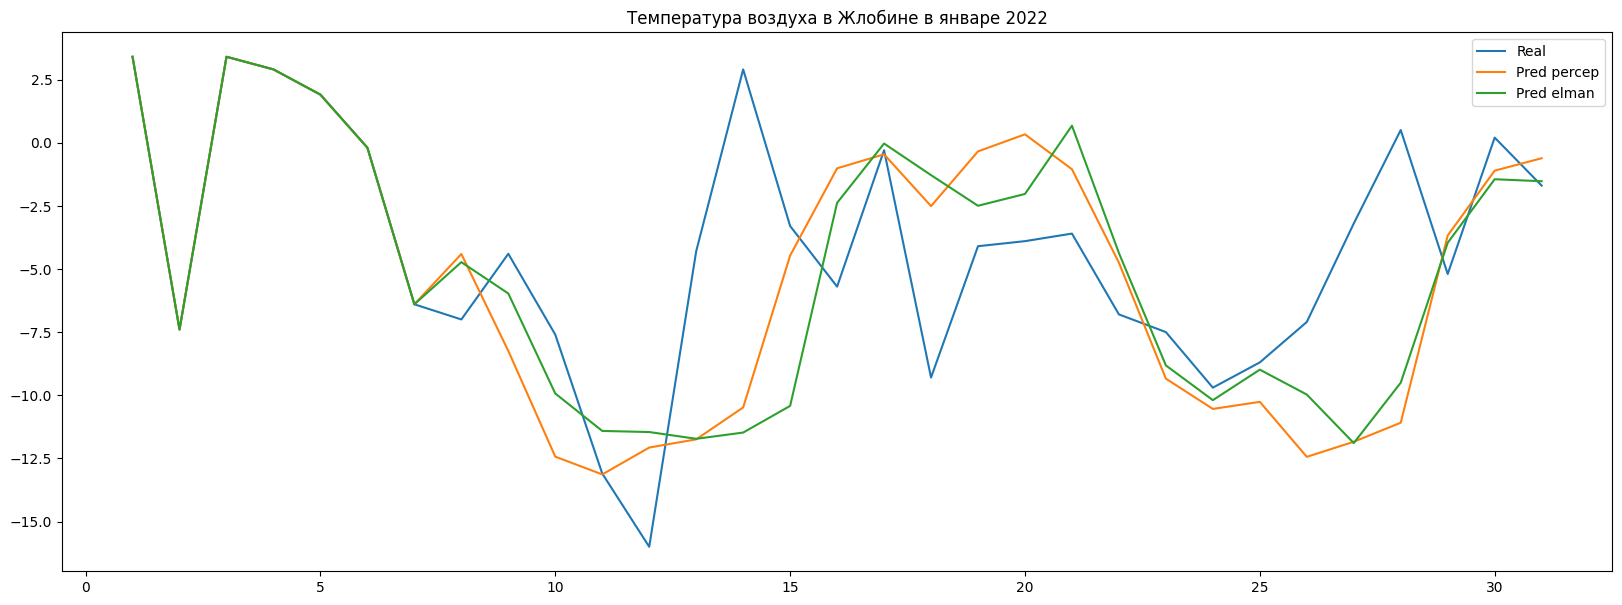

In [114]:
plt.figure(figsize=(20, 7))
plt.title('Температура воздуха в Жлобине в январе 2022')
plt.plot(days, data, label='Real')
plt.plot(days, pred_pr, label='Pred percep')
plt.plot(days, pred_e, label='Pred elman')
plt.legend()
x_test, y_test = make_time_range(data, row_size)
print(f'mse percep = {percep3.get_mse_hitrate(x_test, y_test)}')
print(f'mse elman = {elman.get_mse_hitrate(x_test, y_test)}')